In [29]:
import yfinance as yf 

### All of the following necessary for Lasso Regression
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Lasso 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

## Download

In [30]:
tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end='2025-04-01')['Close']
df.head()

C:\Users\Startklar\AppData\Local\Temp\ipykernel_17220\2576010976.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2020-01-01', end='2025-04-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.538506,94.900497,152.791107,208.848953,3257.850098
2020-01-03,71.833282,93.748497,150.888611,206.935898,3234.850098
2020-01-06,72.405685,95.143997,151.278625,208.269257,3246.280029
2020-01-07,72.065147,95.343002,149.899292,208.240250,3237.179932
2020-01-08,73.224403,94.598503,152.286957,209.805481,3253.050049


## Feature Engineering

In [31]:
#Yesterday's values
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

#Moving Average (MA): Indicator for short term trend 
df['AAPL_MA_5'] = df['AAPL'].rolling(window = 5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window = 5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window = 5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window = 5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window = 5).mean()

#Target variable 
df['Target'] = df['AAPL'].shift(-1)

df = df.dropna()

## Lasso Regression 

### 1) Define Features and Target Variables

In [32]:
X = df[['AAPL(t-1)', 'AMZN(t-1)', 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)',
        'AAPL_MA_5', 'AMZN_MA_5', 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]

Y = df['Target']

### 2) Train Test Split

In [33]:
# 95.6% training and 4.4% testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.044, shuffle=False)

### 3) Apply Lasso Regression

In [34]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, Y_train)

c:\Users\Startklar\quant-risk\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.879e+03, tolerance: 2.199e+02
  model = cd_fast.enet_coordinate_descent(


,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


### 4) Get intercept and Coeff for Lasso Regression 

In [35]:
coefficients = lasso.coef_ 

intercept = lasso.intercept_

coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
#coeff_df.head()

### 5) Predict using Lasso Regression

In [36]:
y_pred = lasso.predict(X_test)

### 6) Create a dataframe with Actual and Predicted Values 

In [37]:
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

### 7) Plot Actual & Predicted Values 

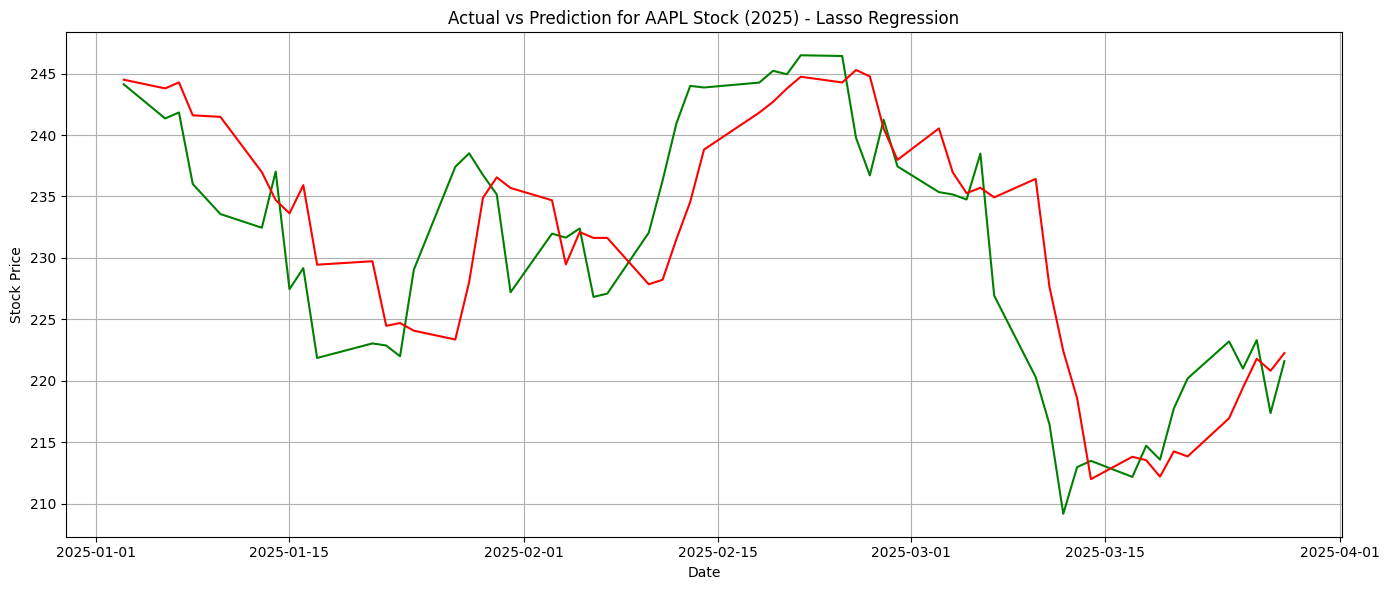

In [38]:
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'green')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Lasso Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.tight_layout()
plt.grid(True)
plt.show()

### 8) Evaluate the model - R square, mse, rmse

In [39]:
r2 = r2_score(Y_test, y_pred)
print("R square", r2)

mse = mean_squared_error(Y_test, y_pred)
print("mse", mse)

rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.6657054467254943
mse 34.63892508913423
rmse 5.8854842697210765
